# Python Project Start
 I will start by examining the peguins_translate.py document using Atom to view. 
 


In [3]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from Bio.Alphabet import generic_dna

the Code Block above I chose to fill with all the packages I wanted to import to run all code

# Part 1: The code block bellow comes from part  1 of Dr. X's assignment where I annotated the function
I describe bellow what each command and function does but here I will explain a summary of the function.
This function will take in a file with multiple fasta entries and create a dictionary that takes the first and second words (so in this case Genus, Speices respectively) and assign that as the keys to the dictionary and then will assign the respective sequences only as a Seq object matched to that key.


In [4]:
def get_sequences_from_file(fasta_fn): #here we are ignitiating the function get_sequence_from_file on what we define (fasta_fn)
    sequence_data_dict = {}    #here we are creating a dictionary to hold keys and objects
    for record in SeqIO.parse(fasta_fn, "fasta"):   #here is our for loop that will extract elements from fasta_fn 
        #and we are telling it that it is a fasta file
  #SeqIO.parce = Sequence input/output as SeqRecord objects seperately.    
        description = record.description.split()#here the description provided by the FASTA file 
    #is split into peices (recognized because of biopython description option), 
       #the defulat split will split by white spaces, giving every string an index
        species_name = description[1] + " " + description[2] #here you are assigning species name 
        #to be description [1] (not index 0 because that includes the > and an id) + "white space" + Description [2], 
        # since its zero indexed you do not take >id#
        sequence_data_dict[species_name] = record.seq  #here you are setting species_name as the key 
        #to dictionary, and that will return you that records sequence
    return(sequence_data_dict)  #this will return the output of the for loop to the Dictionary 
# and the loop will continue through
# each "parsed record"





In [5]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # I wanted to test that the function get_sequences_from_file did
# what I thought it would do by testing it and then viewing it with the .fasta file.

In [6]:
cytb_seqs # the output is the new dictionary with Genus/Species as the keys to the Seq objects that have the respective sequences

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

## Part 2 of the assignment##
####### YOUR STRING-TRANSLATE FUNCTION ########                                                                                 
Bellow is my function that will take in a string of nucleotides and translate that DNA string into amino acid primary sequence. First it assigns mito_table to mean the imported
CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
table. You then assign aa_string to be an empty string. A for loop than assigns bases to   
codons that then match with the Vertebrate Mitochondrial table until the sequence reaces a stop codon. Taking a DNA string and giving you the protien sequence.

In [7]:

def Translate(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
    aa_string = "" #initiating aa_string to be an empty string
    for base in range(0,int(len(string_nucleotides)),3): # a for loop runing through the entire lenght of the string but steping every fourth base
        codon = string_nucleotides[base:base + 3] # next step we take that base of the string plus the next two bases and define that as a codon
        if codon in mito_table.stop_codons: # a for loop to check if each incoming codon is a stop codon, if it is it will stop the main for 
        #loop and return the sequence before the stop codon by defualt
             return aa_string
        aa_string = aa_string + mito_table.forward_table[codon] #telling that each codon match should be added to the string above
    return aa_string #returning the entire string to the aa_string holder

## Part 3 of Dr. X's code assignment
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

In [199]:
# Biopython's .translate is a good utility to highlight here. I wrote it in as a function incase I chose to use
# this one I found on the biopython wiki cite
def biotranslate(string_nucleotides):
    aa_string = string_nucleotides.translate(table=2, to_stop=True) # http://biopython.org/wiki/Seq
    return aa_string #this function .translate is a biopython method that translates a string of nucleotides into amino acid
#sequence, I then set arguments of this method, table = 2 is assigning the function to the correct vertibrate codon table and its stops codons. 
# to_stop=TRUE is telling the method to stop translating the string up intil the stop codon that is defined by biopython.   

## part 4 of assignment
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.

In [8]:
# this function will take an amino acid sequence string and use a bio python method ProteinAnalysis to assign information about
# aa string's amino acids. The method .molecular_weight() will return the sum of the weights of the amino acids in the string of aa.

def compute_molecular_weight(aa_string):
    analysed_seq = ProteinAnalysis(aa_string)
    analysed_seq_mw = analysed_seq.molecular_weight()
    return analysed_seq_mw


## Part 5 of assignment
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [2]:
def Calc_GC_Percent(string_nucleotides):
        gc_count = string_nucleotides.count("G") + string_nucleotides.count("C") # counts all the G's and C's and sums up the number of occurences in the string
        gc_fraction = int(gc_count) / len(string_nucleotides) #reads gc_count as an interager and devides it by the length of the entire sequence
        gc_percent = 100 * gc_fraction #takes the gc_fraction decimal and multiplies by 100 to return the percent
        return gc_percent


### Parts 6-10 of Dr. X python assingment
I included parts 6-10 in this code block because in the directions penguins_translate.py it said to include them in the main part of the script

C:\Users\jmanast.IASTATE\AppData\Local\Continuum\anaconda3\lib\site-packages\Bio\Seq.py:152: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)
C:\Users\jmanast.IASTATE\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


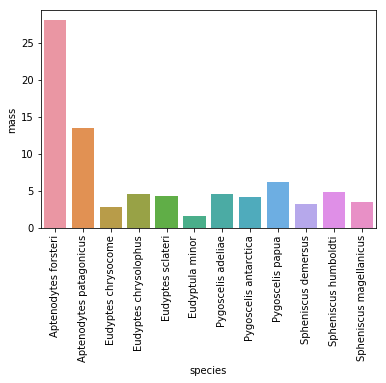

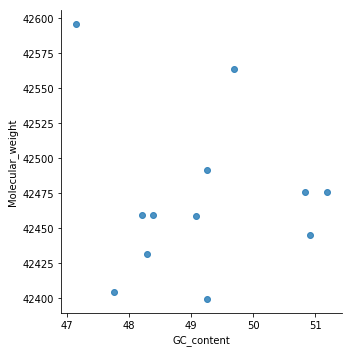

In [25]:
#%%%%%%%%%%%%%%#           I included parts 6-10 in this code block because in the directions penguins_translate.py it                                                                              
###   MAIN   ###           said to include in the main part of the script
#%%%%%%%%%%%%%%#           


cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #running penguins_cytb.fasta through the above described function get_sequences_from_file
penguins_df = pd.read_csv("penguins_mass.csv") # this reads penguins_mass.csv in as a csv to panda data frame named penguins_df
species_list = list(penguins_df.species) #extracting the species entries of the penguins_df with .speices and making that a list name species_list to be used later



## 6 part of Dr. X's code assignment## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

#my code:
penguins_MW_df = penguins_df.assign(Molecular_weight = 'NaN') # this is using the .assign to add a column called Molecular_weight with all rows filled with NaN to the dataframe
penguins_new_columns_df = penguins_MW_df.assign(GC_content = 'NaN') # this is using the .assign to add an aditional column called GC_content with all rows filled with NaN to the dataframe

# https://chrisalbon.com/python/pandas_assign_new_column_dataframe.html





## 7 part of the Dr. X's code assignment##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above


#start of my code for part 7 of assignment:

all_GC = []    #creating an empty list holder called all_GC
all_MW = []    #creating an empty list holder called all_MW

for key, value in cytb_seqs.items(): # a for loop that runs through each key/calue in my dictionary cytb_seqs. .items()  returns a list of dict's (key, value) tuple pairs (https://www.tutorialspoint.com/python/dictionary_items.htm)
    aa_string = Translate(value) #runs each value(matches a sequence string) through the above Translate function ( I chose function from part 2) and translates those sequences and names it aa_string
    
    MW = compute_molecular_weight(aa_string) #runs the amino acids string through my compue_molecular_weight function to count up all the weights of the amino acids
    all_MW.append(MW) #adds each run through the for loop's amino acid weight to the list All_MW in order by defualt
    
    calc_gc = Calc_GC_Percent(value) # runs the value(sequence string) through my Calc_GC_Percent function to calculate the GC percenage for that value
    all_GC.append(calc_gc) #adds each run through the for loop's, Calc_GC_Percent function to the list all_GC in order by defualt
    
    
penguins_new_columns_df['GC_content'] = all_GC #adding my list in order of GC percentages to the data frame
penguins_new_columns_df['Molecular_weight'] = all_MW #adding my list in order of Molecular Weights to the data frame

    

## Part 8 of the assignment ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.    
    
    
#Start of my code for plots:
%matplotlib inline  #Provided you are running IPython, the %matplotlib inline will make your plot outputs appear and be stored within the notebook. source https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline



plot = sns.barplot(x = "species", y = "mass", data = penguins_new_columns_df) #assinging a seaborn bar plot with x axis matching species and
# the y axis as that species mass, the data = is assigning what dataframe to plot from
plot.set_xticklabels(rotation = 90, labels = penguins_new_columns_df['species']) # I did this to rotate the x axis increment names
# by 90 degrees so that they were readable. 
#first plot below is the plot for part 8 of assignment

#Plot part 8 questions
#  Q1 Answer: Eudyptula minor is the smallest penquin species
#  Q2 Answer: Eudyptula minor total amino acid sequence molecular weight is the third highest of the species

## Part 9 of the assignment##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).


sns.lmplot("GC_content", "Molecular_weight", penguins_new_columns_df, fit_reg=False) # a seaborne lmplot to acheive
# part 9's request of plotting a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).


## Part 10 of the assignment##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

penguins_new_columns_df.to_csv("penguins_new_columns_df.csv")  #saves the data frame penguins_new_columns_df to a csv file
# in notebooks home directory, I will upload this file to the github repository



In [11]:
penguins_new_columns_df # test of my data frame, all functions of the main block worked as expected, I checked each data frame
# (with altering names) after each line of code in the main block. Below is the new dataframe with correctly imputed values 
# for the last check

,species,mass,Molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


## 11 - BONUS ##
What else can we do with this dataset in Python? 
Add functions or anything that might be interesting and fun. (optional)


for part 11 (extra credit) of the assignment I chose to plot species versus the sum of the molecular weights of each amino acid in each species of penguin's sequence with a seaborn lm plot.
the source for this code I found in the classes python notes. This below graph also fits the axis to the ranges of the
weights which allows you to show ow closely grouped together they are. The graph also has a legend that shows you what
color of the points matches to which species, I played with values of the classes notes code until I liked how the below 
outputed plot looked

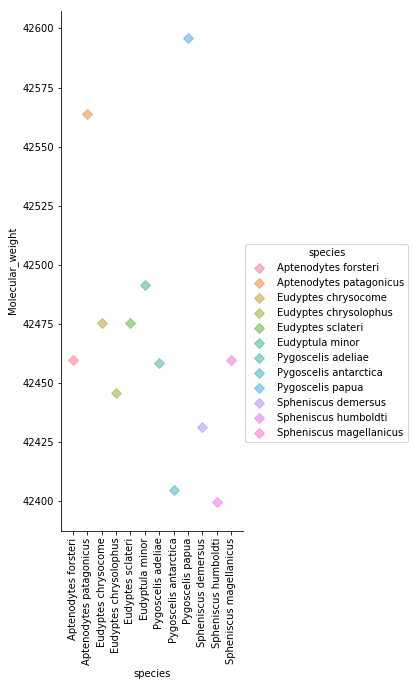

In [43]:


plot_3_extra_credit = sns.lmplot("species", "Molecular_weight", penguins_new_columns_df, fit_reg=False, size=8,
           aspect=0.5, scatter_kws={'alpha':0.5,"s": 50}, hue='species', markers='D')

plot_3_extra_credit.set_xticklabels(rotation = 90, labels = penguins_new_columns_df['species'])
#did this to make x axis species names readable again

